<img src='delta.jpg' width='500' height = '350' align='center'>

<div style="background-color:#f0f0f0; padding:10px; border-radius:5px;">
    <h2 style="color:#333333; text-align:center;">Scenario 🛫</h2>
    <p style="color:#555555; font-size:16px;">
        Picture yourself as a consultant working closely with Delta Airlines. The airline is eager to understand whether enhancing the <strong>in-flight entertainment (IFE) experience</strong> can lead to heightened customer satisfaction. Your task is to construct and assess a model predicting whether future customers would be satisfied with Delta's services based on past customer feedback regarding their flight experiences. We have data from a sample size of <strong>129,880</strong> customers, featuring key metrics such as class, flight distance, and in-flight entertainment quality, among others.
    </p>
</div>

<div style="background-color:#f0f0f0; padding:10px; border-radius:5px;">
    <h2 style="color:#333333; text-align:center;">Objective 📊</h2>
    <p style="color:#555555; font-size:16px;">
        The aim is to evaluate the correlation between in-flight entertainment quality and customer satisfaction for Delta Airlines, utilizing <strong>binomial logistic regression</strong>.
    </p>
</div>

<div style="background-color:#f0f0f0; padding:10px; border-radius:5px;">
    <h2 style="color:#333333; text-align:center;">Goals 🎯</h2>
    <ol style="color:#555555; font-size:16px;">
        <li>Develop a predictive model to classify customer satisfaction based on historical feedback.</li>
        <li>Provide actionable insights aimed at enhancing the overall customer experience.</li>
    </ol>
</div>

In [1]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Delta_Airline.csv')

In [3]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Check unique values in categorical columns
cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']

for i in cols:
    print(df[i].value_counts())
    print('')

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64



In [7]:
# Dataframe for Nulls and their percentage in column 
nulls = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['perecntage_nulls'])
nulls['total_nulls'] = df.isnull().sum()
nulls

,perecntage_nulls,total_nulls
satisfaction,0.000000,0
Customer Type,0.000000,0
Age,0.000000,0
Type of Travel,0.000000,0
Class,0.000000,0
Flight Distance,0.000000,0
Seat comfort,0.000000,0
Departure/Arrival time convenient,0.000000,0
Food and drink,0.000000,0
Gate location,0.000000,0


- For now, the missing values should be removed for two reasons:
    - There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
    - This column might impact the relationship between entertainment and satisfaction.

In [8]:
# Dropping nulls:
df_subset = df.dropna(axis=0).reset_index(drop = True)

In [9]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

In [10]:
# Creating a copy

df_copy = df_subset.copy()

In [12]:
# Convert the categorical target feature to Numeric using OneHotEncoder since we have binary values
df_copy['satisfaction'] = OneHotEncoder(drop = 'first').fit_transform(df_copy[['satisfaction']]).toarray()

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  float64
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

In [14]:
df_copy.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [16]:
# Splitting data:
X = df_copy[["Inflight entertainment"]]
y = df_copy["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
# Model buidling:
clf = LogisticRegression().fit(X_train,y_train)

In [19]:
# Coefficient of IFE
clf.coef_

array([[0.99751462]])

In [23]:
# Intercept for IFE
clf.intercept_

array([-3.19355406])

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction'>

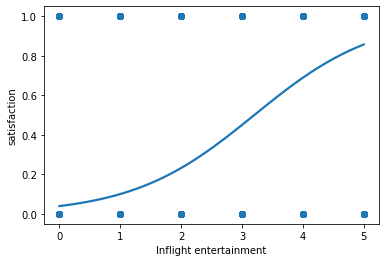

In [24]:
# Regression plot
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_copy, logistic=True, ci=None)

**Observation**: The graph seems to indicate that the higher the `inflight entertainment` value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as `Inflight entertainment` is categorical.

In [18]:
# Predicitons:
y_pred = clf.predict(X_test)

In [27]:
# Performance metrics
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))
print('Accuracy:', "%.6f" % metrics.accuracy_score(y_test, y_pred))

Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827
Accuracy: 0.801529


## Evaluating results

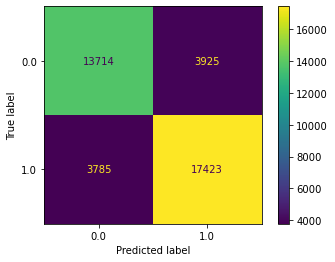

In [31]:
# Confusion matrix:
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels= clf.classes_)
disp.plot()

**Observation**:
- Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.
- Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.
- There isn't a large difference in the number of false positives and false negatives.
- How can the model be improved?
    - Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

## Executive Summary
* Logistic regression accurately predicted satisfaction 80.2 percent of the time.
* The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 